<img src="Images/logo.jpg" width="600">

## <center> <span style="color:darkred"> Exercitation_12 </span> </center>

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

In [3]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

opt = 'Adam'     ###CHANGE THE OPTIMIZER HERE 
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,     
                  metrics=['accuracy'])
    return model

### <font color="blue"> Part 01

I tried to set all the given parameters and change some different optimizer, which can be changed in the cell above, before the *compile_model* function (the right line is commented).  
The code I used is reported below, and then I report the results obtained.

In [4]:
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#print('X_train shape:', X_train.shape)
#print('Y_train shape:', Y_train.shape)
#print()
#print(X_train.shape[0], 'train samples')
#print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 183us/step - loss: 0.2839 - accuracy: 0.9154 - val_loss: 0.1160 - val_accuracy: 0.9629
Epoch 2/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.1222 - accuracy: 0.9653 - val_loss: 0.0830 - val_accuracy: 0.9737
Epoch 3/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.0863 - accuracy: 0.9743 - val_loss: 0.0795 - val_accuracy: 0.9770
Epoch 4/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.0698 - accuracy: 0.9793 - val_loss: 0.0707 - val_accuracy: 0.9797
Epoch 5/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.0691 - val_accuracy: 0.9802


In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

plt.figure(figsize=(16,5))
# print performance
print()
print(('-- OPTIMIZER: %s --' %opt ).center(120))
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.rc('text', usetex=True)


# summarize history for accuracy
plt.subplot(121)
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(122)
plt.title('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

#plt.savefig('Images/%s.jpg' % opt)

plt.show()

I set the *batch_size*$=32$ and the $N_\mathrm{epochs}=5$, and I used the following optimizers available in Keras: *Adam, RMSprop, Adagrad, Adadelta, Adamax* and *Nadam*.
_______________________________________________________________________________________________________________________
<img src="Images/Adam.png">
_______________________________________________________________________________________________________________________
<img src="Images/RMSprop.png">
_______________________________________________________________________________________________________________________
<img src="Images/Adagrad.png">
_______________________________________________________________________________________________________________________
<img src="Images/Adadelta.png">
_______________________________________________________________________________________________________________________
<img src="Images/Adamax.png">
_______________________________________________________________________________________________________________________
<img src="Images/Nadam.png">
_______________________________________________________________________________________________________________________

Comparing these simulations I can conclude that
- *Nadam* has the best accuracy, *Adamax* che best loss
- *RMSprop* has both the worst accuracy and loss

### <font color="blue"> Part 02

I modified the given code adding `MaxPooling2D`, `Conv2D` and a `Flatten` layer. Finally I put the layer with *softmax* activation, essential for problems of classification as this one.  
Then I operate in the same way as the previous part, training the CNN and then evaluating its performances.

In [6]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
  
    model.add(MaxPooling2D(pool_size=(2,2),strides = None, padding = 'valid', data_format = None))
    model.add(Conv2D(15, kernel_size=(5, 5),activation='elu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(4,4),strides = None, padding = 'valid', data_format = None))
    model.add(Conv2D(10, kernel_size=(2, 2),activation='sigmoid',input_shape=input_shape))
    
    model.add(Flatten())
    model.add(Dense(410, activation='elu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [7]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels

# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [8]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 329us/step - loss: 2.2884 - accuracy: 0.1380 - val_loss: 2.1991 - val_accuracy: 0.3304
Epoch 2/5
60000/60000 [==============================] - 19s 319us/step - loss: 1.3121 - accuracy: 0.6248 - val_loss: 0.5569 - val_accuracy: 0.8805
Epoch 3/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.3694 - accuracy: 0.9125 - val_loss: 0.2271 - val_accuracy: 0.9417
Epoch 4/5
60000/60000 [==============================] - 19s 321us/step - loss: 0.2202 - accuracy: 0.9413 - val_loss: 0.1838 - val_accuracy: 0.9470
Epoch 5/5
60000/60000 [==============================] - 19s 321us/step - loss: 0.1723 - accuracy: 0.9523 - val_loss: 0.1367 - val_accuracy: 0.9603


10000/10000 [==============================] - 1s 121us/step

Test loss: 0.1367145512700081
Test accuracy: 0.9603000283241272


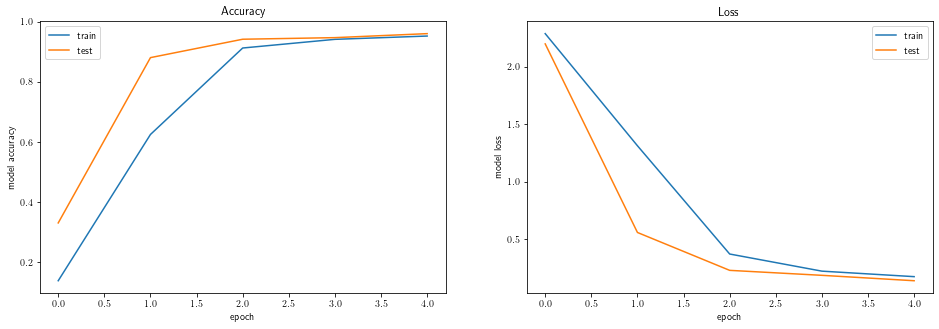

In [9]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.rc('text', usetex=True)

plt.figure(figsize=(16,5))
# summarize history for accuracy
plt.subplot(121)
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(122)
plt.title('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.show()

This CNN should be now able to predict which number between 0 and 9 has been hand-written. In the following mirror I can see its ability.

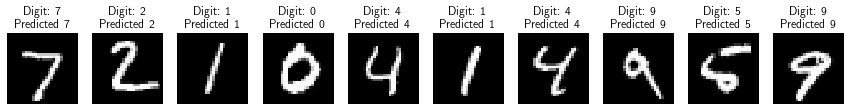

In [10]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Surpringsly it correctly predict all the test numbers. It seems more able to do it with respect to the DNN we saw during the lesson, which couldn't predict the last but one (badly written...) 5. 

### <font color="blue"> Part 03

In [ ]:
digit_filename = "Images/m1.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
pred_0 = model_CNN.predict(data)
data = data.reshape(xdim,ydim)
plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:  {}".format(np.argmax(pred_0)), fontsize=50)
plt.axis('off')
plt.savefig("Images/p1.png")
plt.show()

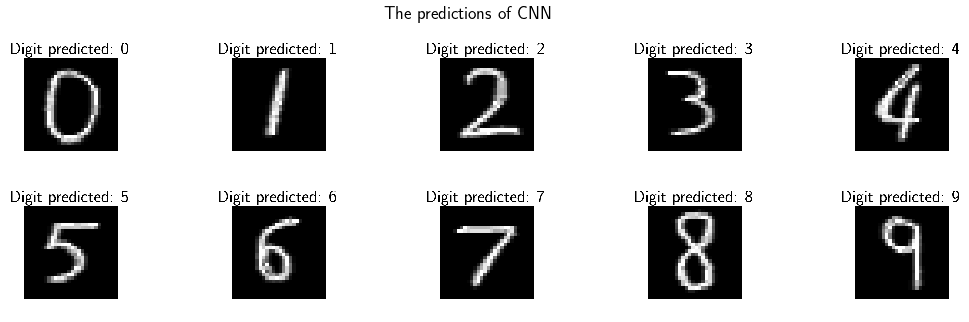

In [12]:
import matplotlib.image as mpimg

plt.figure(figsize=(18,5))
plt.suptitle('The predictions of CNN', fontsize=18)
for i in range(10): 
    ax = plt.subplot(2, 5, i + 1)
    img = mpimg.imread('Images/p%r.png' %i )
    imgplot = plt.imshow(img)
    plt.axis('off')
plt.show()

With the numbers which can be written in a significative different way, I tried to see if the CNN was able to recognize them, and I can conclude that the way one writes the numbers is significative. 

<table><tr><td><img src='Images/p0a.png'></td><td><img src='Images/p1a.png'></td><td><img src='Images/p4a.png'></td><td><img src='Images/p9a.png'></td><td><img src='Images/p9b.png'></td></tr></table>

Finally I test the CNN with a number written in a corner of the picture, and it was not able to predict it well.

<img src="Images/pcorner.png">